## San Francisco Crime Data Analysis

### Objective: 
1. Preliminary analysis using historical record to understand criminal patterns and trends in San Francisco 
2. Provide actionable recommendations to public health & safety agencies (law enforcement, suicide hotlines, etc.) and helpful guidance to local residents and tourists 

### Data source: Police Department Incident Reports
- Link: https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry
- Time Period: January 2003 - May 2018

### Critical Steps in the Analysis
- Section 0: Data collection and preprocessing
- Section 1: Crime category and quantity analysis
- Section 2: Geographical analysis
- Section 3: Weekly cycle analysis (case study: San Francisco downtown)
- Section 4: Monthly cycle analysis (period: 2015 - 2018)
- Section 5: Daily cycle analysis (case study: pre-holiday December 15 of 2015/2016/2017)
- Section 6: Daily cycle analysis (case study: top 3 dangerous district)
- Section 7: Resolution impact analysis

### Section 0: Data collection and preprocessing

In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"

In [0]:
# Run with caution: loading may take long due to data size
# import urllib.request
# urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/myxxxx.csv")
# dbutils.fs.mv("file:/tmp/myxxxx.csv", "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv")
# display(dbutils.fs.ls("dbfs:/laioffer/spark_hw1/data/"))

data_path = "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv"

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
3114751606302,031147516,06302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5069701104134,050697011,04134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),97,4,11,39,7,9,11,29490,41,null,null,null,null,null,null,2,null,null,null,null,97
6074729204104,060747292,04104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),106,6,3,6,3,1,10,308,4,null,null,null,null,null,null,2,null,null,null,null,106
7103536315201,071035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),49,10,8,41,1,8,4,59,40,null,null,null,null,null,null,1,null,null,null,null,49
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),null,null,null,null,null,null,null,28588,null,null,null,null,null,null,null,null,null,null,null,null,null
4037801104134,040378011,04134,ASSAULT,BATTERY,Friday,12/12/2003,12:00,SOUTHERN,NONE,500 Block of I-80,-122.386667033903,37.7898821569191,POINT (-122.38666703390301 37.7898821569191),null,null,null,null,null,null,null,28856,null,null,null,null,null,null,null,null,null,null,null,null,null
4147669007025,041476690,07025,VEHICLE THEFT,STOLEN TRUCK,Thursday,12/30/2004,19:00,BAYVIEW,NONE,100 Block of KAREN CT,-122.407531316146,37.723291086507,POINT (-122.40753131614602 37.723291086507),91,2,2,25,10,3,7,309,28,null,null,null,null,null,null,1,null,null,null,null,91
16010127305073,160101273,05073,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Wednesday,02/03/2016,20:30,MISSION,"ARREST, BOOKED",2300 Block of 16TH ST,-122.40952991327822,37.76571843952822,POINT (-122.40952991327822 37.76571843952822),53,3,9,20,8,4,8,28853,19,null,null,null,3,null,null,2,null,null,3,null,53
17004924306243,170049243,06243,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,01/18/2017,18:20,TARAVAL,NONE,NORIEGA ST / SUNSET BL,-122.49522504431104,37.75341185338174,POINT (-122.49522504431104 37.75341185338174),39,10,7,35,1,8,3,56,35,null,null,null,null,null,null,1,null,null,null,null,39
16065828006244,160658280,06244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/14/2016,21:00,TARAVAL,NONE,3200 Block of 20TH AV,-122.47564746078615,37.72852806274646,POINT (-122.47564746078615 37.72852806274647),41,10,8,16,1,8,4,64,14,null,null,null,null,null,null,2,null,null,null,null,41


In [0]:
#Missing value percentage.
df_opt1_pandas = df_opt1.toPandas()
df_opt1_pandas.info()
column_names = df_opt1_pandas.columns.tolist()
column_names_df = pd.DataFrame(column_names, index = column_names, columns = ['Name'])
total = df_opt1_pandas.isnull().sum().rename('Total')
percent = (df_opt1_pandas.isnull().sum()/df_opt1_pandas.isnull().count()).rename('Percent')
missing_data = pd.concat([column_names_df, total,percent], axis = 1)
display(missing_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129525 entries, 0 to 2129524
Data columns (total 35 columns):
 #   Column                                                    Dtype 
---  ------                                                    ----- 
 0   PdId                                                      object
 1   IncidntNum                                                object
 2   Incident Code                                             object
 3   Category                                                  object
 4   Descript                                                  object
 5   DayOfWeek                                                 object
 6   Date                                                      object
 7   Time                                                      object
 8   PdDistrict                                                object
 9   Resolution                                                object
 10  Address                                   

Name,Total,Percent
PdId,0,0.0
IncidntNum,0,0.0
Incident Code,0,0.0
Category,0,0.0
Descript,0,0.0
DayOfWeek,0,0.0
Date,0,0.0
Time,0,0.0
PdDistrict,0,0.0
Resolution,0,0.0


Out[62]: <AxesSubplot:>

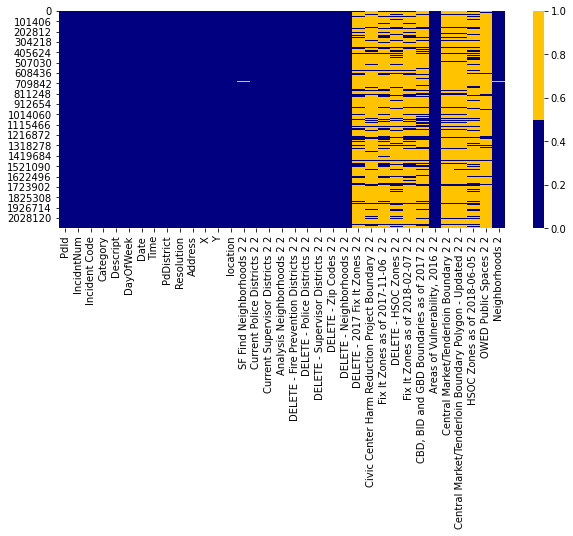

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,4))
sns.heatmap(df_opt1_pandas.isna(), cmap = ['#000080', '#FFC300'])

### Section 1: Crime category and quantity analysis

In [0]:
q1_result = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(q1_result)

category,count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


In [0]:
q1_sql_result = spark.sql("SELECT category, COUNT(*) AS count FROM sf_crime GROUP BY category ORDER BY Count DESC")
display(q1_sql_result)

category,count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


Out[29]: Text(0.5, 1.0, 'Crime Category Analysis')

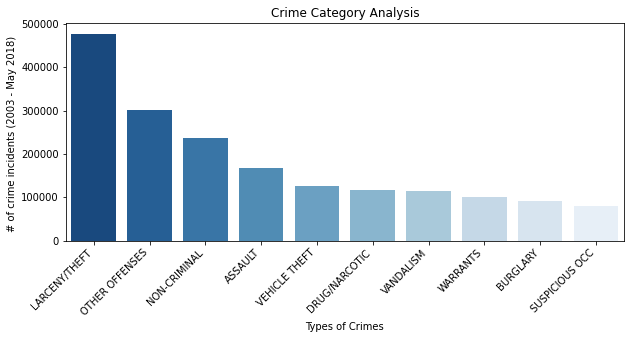

In [0]:
import seaborn as sns
fig_dims = (10,4)
fig = plt.subplots(figsize=fig_dims)
spark_df_q1_plot = q1_result.toPandas()
chart = sns.barplot(x = 'category', y = 'count', palette= 'Blues_r',data = spark_df_q1_plot[0:10] )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
plt.xlabel('Types of Crimes')
plt.ylabel('# of crime incidents (2003 - May 2018) ')
plt.title('Crime Category Analysis')

### Takeaways:
Quantity should not be the only way to measure crimes. 
- Certain severe crimes such as murder, rape and missing person didn't even make it to the top 10 but should be categorized as severe and benchmarked against other cities
- Crimes such as theft and assaults, if with certain scale (in monetary value or lives) or when reaching a certain number, should be addressed systematically with government programs  
- Certain crimes are hard to define or a combination of several categories and thus grouped as a miscelaneous option called "other offenses". More in-depth analysis should be done 

In further investigation, propose prioritizing top items with different dimensions of consideration, such as 
- high quantity and consistency (theft)
- high severity (murder)
- public complaints (human feces on sidewalks in early 2018 grouped in vandalism)  

Futhermore, geographical analysis should be done on where crimes happen within San Francisco

### Section 2: Geographical analysis

In [0]:
q2_df_result = df_opt1.groupBy('PdDistrict').count().orderBy('Count', ascending=False)
display(q2_df_result)

PdDistrict,count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


In [0]:
q2_df_result = df_opt1.groupBy('PdDistrict').count().orderBy('Count', ascending=False)
display(q2_df_result)

PdDistrict,count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


In [0]:
q2_sql_result = spark.sql("SELECT PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY PdDistrict ORDER BY Count DESC")
display(q2_sql_result)

PdDistrict,Count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


Out[16]: Text(0, 0.5, '# of crime incidents (2003 - May 2018)')

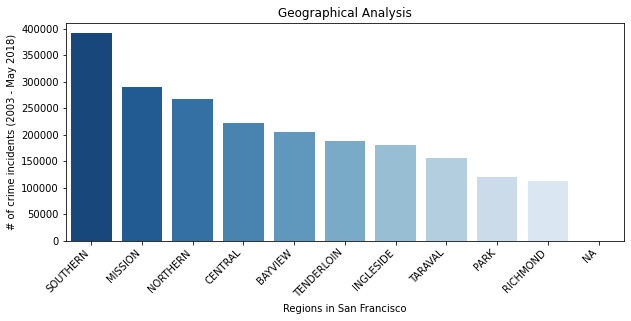

In [0]:
fig_dims = (10,4)
fig = plt.subplots(figsize=fig_dims)
q2_df_result_plot = q2_df_result.toPandas()
chart = sns.barplot(x = 'PdDistrict', y = 'count', palette= 'Blues_r',data = q2_df_result_plot )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Geographical Analysis')
plt.xlabel('Regions in San Francisco')
plt.ylabel('# of crime incidents (2003 - May 2018)')

### Takeaways:
Quantity should not be the only way to measure whether a region is safe or not
- analysis should be done with combination of section 1 (type of crimes)
- it is also important to understand the size and location of the district

With 15 years of data, further analysis should be done on the following dimension:
- trend analysis on how crime rates have changed over the years per region
- case studies should be done for certain region of importance to understand crime cycles

### Section 3: Weekly cycle analysis (case study: San Francisco downtown)

Assumption: 
- SF downtown is defiend by the range of spatial location with approximation of a rectangle.
- San Francisco Latitude and longitude coordinates are: 37.773972, -122.431297. X and Y represents each. 
- So we assume SF downtown spacial range: X (-122.4213,-122.4313), Y(37.7540,37.7740).

In [0]:
df_opt2 = df_opt1[['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location']]
display(df_opt2)
df_opt2.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
031147516,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90)
050697011,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603)
060747292,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123)
071035363,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449)
110824152,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459)
040378011,ASSAULT,BATTERY,Friday,12/12/2003,12:00,SOUTHERN,NONE,500 Block of I-80,-122.386667033903,37.7898821569191,POINT (-122.38666703390301 37.7898821569191)
041476690,VEHICLE THEFT,STOLEN TRUCK,Thursday,12/30/2004,19:00,BAYVIEW,NONE,100 Block of KAREN CT,-122.407531316146,37.723291086507,POINT (-122.40753131614602 37.723291086507)
160101273,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Wednesday,02/03/2016,20:30,MISSION,"ARREST, BOOKED",2300 Block of 16TH ST,-122.40952991327822,37.76571843952822,POINT (-122.40952991327822 37.76571843952822)
170049243,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,01/18/2017,18:20,TARAVAL,NONE,NORIEGA ST / SUNSET BL,-122.49522504431104,37.75341185338174,POINT (-122.49522504431104 37.75341185338174)
160658280,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/14/2016,21:00,TARAVAL,NONE,3200 Block of 20TH AV,-122.47564746078615,37.72852806274646,POINT (-122.47564746078615 37.72852806274647)


In [0]:
from pyspark.sql.functions import hour, date_format, to_date, month, year
# add new columns to convert Date to date format
df_new = df_opt2.withColumn("IncidentDate",to_date(df_opt2.Date, "MM/dd/yyyy")) 
# extract month and year from incident date
df_new = df_new.withColumn('Month',month(df_new['IncidentDate']))
df_new = df_new.withColumn('Year', year(df_new['IncidentDate']))
display(df_new.take(5))

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,IncidentDate,Month,Year
031147516,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),2003-09-28,9,2003
050697011,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),2005-06-22,6,2005
060747292,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),2006-07-15,7,2006
071035363,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),2007-09-25,9,2007
110824152,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),2011-09-24,9,2011


In [0]:
sf_downtown = (df_new.X > -122.4313) & (df_new.X < -122.4213) & (df_new.Y < 37.7740) & (df_new.Y > 37.7540 )
q3_df_result = df_new.filter((df_new.DayOfWeek == "Sunday") & (sf_downtown)).groupby('IncidentDate','DayOfWeek').count().orderBy('IncidentDate')
display(q3_df_result)

IncidentDate,DayOfWeek,count
2003-01-05,Sunday,13
2003-01-12,Sunday,20
2003-01-19,Sunday,17
2003-01-26,Sunday,13
2003-02-02,Sunday,14
2003-02-09,Sunday,22
2003-02-16,Sunday,12
2003-02-23,Sunday,14
2003-03-02,Sunday,16
2003-03-09,Sunday,8


In [0]:
sf_downtown = (df_new.X > -122.4313) & (df_new.X < -122.4213) & (df_new.Y < 37.7740) & (df_new.Y > 37.7540 )
q3_df_result_02 = df_new.filter(sf_downtown).groupby('IncidentDate','DayOfWeek').count().orderBy('IncidentDate')
display(q3_df_result_02)

IncidentDate,DayOfWeek,count
2003-01-01,Wednesday,27
2003-01-02,Thursday,9
2003-01-03,Friday,18
2003-01-04,Saturday,14
2003-01-05,Sunday,13
2003-01-06,Monday,6
2003-01-07,Tuesday,17
2003-01-08,Wednesday,28
2003-01-09,Thursday,17
2003-01-10,Friday,16


In [0]:
q3_sql_result = spark.sql("SELECT IncidentDate, DayOfWeek, COUNT(*) AS Count FROM sf_crime WHERE DayOfWeek = 'Sunday' \
                          AND X > -122.4313 AND X < -122.4213 AND Y > 37.7540 AND Y < 37.7740 \
                          GROUP BY IncidentDate, DayOfWeek ORDER BY IncidentDate")
display(q3_sql_result)



In [0]:
allcrime = spark.sql("SELECT DayOfWeek,COUNT(*) AS crime_cnt FROM sf_crime GROUP BY 1")
display(allcrime) #294592 sunday

DayOfWeek,crime_cnt
Wednesday,311601
Tuesday,302455
Friday,324151
Thursday,303893
Saturday,308907
Monday,294530
Sunday,283988


### Takeaways:
In this preliminary analysis, at least from the total volumn perspective, day of the week doesn't have obvious impact on crime rate
Further analysis can be done for certain holidays of the year or significant events (e.g., sport) worth celebration.
e.g., the peak value on June 30th, 2013 happens to coincide with two significant events of celebration:
1. San Francisco Giants beat Colorado Rockies
2. San Francisco Pride Parade

Another suggestion is to zoom out from weekly analysis to monthly analysis to seek patterns in data

###Section 4: Monthly cycle analysis (period: 2015 - 2018)

In [0]:
years = [2015, 2016, 2017, 2018]
df_years = df_new[df_new.Year.isin(years)]
display(df_years.take(5))

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,IncidentDate,Month,Year
160101273,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Wednesday,02/03/2016,20:30,MISSION,"ARREST, BOOKED",2300 Block of 16TH ST,-122.40952991327822,37.76571843952822,POINT (-122.40952991327822 37.76571843952822),2016-02-03,2,2016
170049243,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,01/18/2017,18:20,TARAVAL,NONE,NORIEGA ST / SUNSET BL,-122.49522504431104,37.75341185338174,POINT (-122.49522504431104 37.75341185338174),2017-01-18,1,2017
160658280,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/14/2016,21:00,TARAVAL,NONE,3200 Block of 20TH AV,-122.47564746078615,37.72852806274646,POINT (-122.47564746078615 37.72852806274647),2016-08-14,8,2016
180322603,DRUG/NARCOTIC,POSSESSION OF HEROIN,Tuesday,05/01/2018,13:27,SOUTHERN,"ARREST, BOOKED",600 Block of STEVENSON ST,-122.41265189435406,37.77951316688882,POINT (-122.41265189435406 37.77951316688882),2018-05-01,5,2018
176125180,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,05/16/2017,13:00,RICHMOND,NONE,500 Block of JOHNFKENNEDY DR,-122.46620466789287,37.772540539159316,POINT (-122.46620466789287 37.772540539159316),2017-05-16,5,2017


In [0]:
spark_df_q4 = df_years.groupby(['Year', 'Month']).count().orderBy('Year','Month')
display(spark_df_q4)

Year,Month,count
2015,1,13181
2015,2,11882
2015,3,13463
2015,4,12526
2015,5,13318
2015,6,12853
2015,7,12949
2015,8,13317
2015,9,12476
2015,10,12697


In [0]:
df_opt2.createOrReplaceTempView('sf_crime')

q4_sql_result = spark.sql("""
                       SELECT SUBSTRING(Date,1,2) AS Month, SUBSTRING(Date,7,4) AS Year, COUNT(*) AS Count
                       FROM sf_crime
                       GROUP BY Year, Month
                       HAVING Year in (2015, 2016, 2017, 2018) 
                       ORDER BY Year, Month
                       """)
display(q4_sql_result)

Month,Year,Count
01,2015,13181
02,2015,11882
03,2015,13463
04,2015,12526
05,2015,13318
06,2015,12853
07,2015,12949
08,2015,13317
09,2015,12476
10,2015,12697


### Takeaways:
Overall there has been a gradual decrease in crime volume from 2015 to 2018, specifically,
- crime volumn from 2015 to 2017 was very high, especially the theft crime, and there has been a downward trend in 2018, especially in May. 
- crime rate was high in 2015, which may partially due to the 47th Act signed by the governor in the California referendum in 2014, which led to a large number of theft and robbery crimes. 
- decrease in crime volumn in 2018 may be due to the San Francisco Police Department increasing uniformed police patrols, hence violence and theft activities have been greatly reduced. In addition, the San Francisco Police Department stepped up its crackdown on the drug trade, which is also one of the reasons for the decline in crime rate.

### Section 5: Daily cycle analysis (case study: pre-holiday December 15 of 2015/2016/2017)

In [0]:
from pyspark.sql.functions import to_timestamp
# add new columns to convert Time to hour format
df_new1 = df_new.withColumn('IncidentTime', to_timestamp(df_new['Time'],'HH:mm')) 
# extract hour from incident time
df_new1 = df_new1.withColumn('Hour',hour(df_new1['IncidentTime']))
display(df_new1.take(5))


IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,IncidentDate,Month,Year,IncidentTime,Hour
031147516,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),2003-09-28,9,2003,1970-01-01T10:00:00.000+0000,10
050697011,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),2005-06-22,6,2005,1970-01-01T12:20:00.000+0000,12
060747292,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),2006-07-15,7,2006,1970-01-01T00:55:00.000+0000,0
071035363,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),2007-09-25,9,2007,1970-01-01T00:01:00.000+0000,0
110824152,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),2011-09-24,9,2011,1970-01-01T11:00:00.000+0000,11


In [0]:
dates = ['12/15/2015','12/15/2016','12/15/2017']
df_days = df_new1[df_new1.Date.isin(dates)]
spark_df_q5_1 = df_days.groupby('Hour','Date').count().orderBy('Date','Hour')
display(spark_df_q5_1)

Hour,Date,count
0,12/15/2015,15
1,12/15/2015,6
2,12/15/2015,5
3,12/15/2015,4
4,12/15/2015,10
5,12/15/2015,3
6,12/15/2015,4
7,12/15/2015,8
8,12/15/2015,12
9,12/15/2015,10


#### Takeaways:
- the two peak periods of crime are 12:00 and 18:00, corresponding to peak hours for ourdoor dining 
- the nonpeak period of crime is around 2:00 and 6:00, which makes sense as most people are asleep
- it is worth it to recommend tourists and locals be alert during those hours and increase patrol during those hours

#### Section 6: Daily cycle analysis (case study: top 3 dangerous district)
- step 1: find out the regions with highest crime volume
- step 2: drill down to the crime category of each region

In [0]:
spark_df_q6_s1 = df_new.groupby('PdDistrict').count().orderBy('count',ascending = False)
display(spark_df_q6_s1)


PdDistrict,count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


In [0]:
top3_danger = df_new.groupby('PdDistrict').count().orderBy('count',ascending = False).head(3)
top3_danger_district = [top3_danger[i][0] for i in range(3)]
top3_danger_district

Out[62]: ['SOUTHERN', 'MISSION', 'NORTHERN']

In [0]:
spark_df_q6_s2 = df_new1.filter(df_new1.PdDistrict.isin('SOUTHERN', 'MISSION', 'NORTHERN')).groupby('Category','Hour').count().orderBy('Category','Hour')
display(spark_df_q6_s2)

Category,Hour,count
ARSON,0,84
ARSON,1,77
ARSON,2,84
ARSON,3,95
ARSON,4,74
ARSON,5,60
ARSON,6,50
ARSON,7,28
ARSON,8,34
ARSON,9,28


### Takeaways:
- Theft, assult and drug/narcotic remain to be the top categories for the three regions, compared to overall region
- Peak and non-peak hours for crime is consistent with previous analysis

#### Section 7: Resolution impact analysis

In [0]:
%sql select distinct(resolution) as resolve from sf_crime


resolve
EXCEPTIONAL CLEARANCE
"ARREST, BOOKED"
PROSECUTED FOR LESSER OFFENSE
LOCATED
UNFOUNDED
DISTRICT ATTORNEY REFUSES TO PROSECUTE
PSYCHOPATHIC CASE
COMPLAINANT REFUSES TO PROSECUTE
"ARREST, CITED"
PROSECUTED BY OUTSIDE AGENCY


In [0]:
import pyspark.sql.functions as f
from pyspark.sql.window import Window
resolution_func = udf (lambda x: x != 'NONE')
spark_df_q7 = df_new.withColumn('IsResolution', resolution_func(f.col('Resolution')))
spark_df_q7 = spark_df_q7.groupBy('category', 'Resolution', 'IsResolution').count().withColumnRenamed('count', 'resolved').orderBy('category')
spark_df_q7 = spark_df_q7.withColumn('total', f.sum('resolved').over(Window.partitionBy('category')))\
             .withColumn('percentage%', f.col('resolved')*100/f.col('total'))\
             .filter(spark_df_q7.IsResolution == True).orderBy('percentage%', ascending=False)
display(spark_df_q7)

category,Resolution,IsResolution,resolved,total,percentage%
WARRANTS,"ARREST, BOOKED",true,93092,99821,93.25893349094879
DRIVING UNDER THE INFLUENCE,"ARREST, BOOKED",true,4941,5652,87.42038216560509
STOLEN PROPERTY,"ARREST, BOOKED",true,9693,11450,84.65502183406113
DRUG/NARCOTIC,"ARREST, BOOKED",true,97926,117821,83.11421563218781
DRUNKENNESS,"ARREST, BOOKED",true,7471,9760,76.54713114754098
LIQUOR LAWS,"ARREST, BOOKED",true,1839,2840,64.75352112676056
WEAPON LAWS,"ARREST, BOOKED",true,13334,21004,63.48314606741573
LOITERING,"ARREST, CITED",true,1432,2402,59.61698584512906
PROSTITUTION,"ARREST, CITED",true,9667,16501,58.584328222531965
BRIBERY,"ARREST, BOOKED",true,418,796,52.51256281407035


In [0]:
df_opt2.createOrReplaceTempView('sf_crime')

q7_sql_result_02 = spark.sql("""
                       SELECT DISTINCT(category) as type, COUNT(*) as Count, SUBSTRING(Date,7,4) AS Year 
                       FROM sf_crime
                       GROUP BY type, year
                       HAVING Year in (2015, 2016, 2017, 2018) 
                       ORDER BY Year, Count DESC
                       """)
display(q7_sql_result_02)

type,Count,Year
LARCENY/THEFT,41980,2015
OTHER OFFENSES,20052,2015
NON-CRIMINAL,19098,2015
ASSAULT,11090,2015
VEHICLE THEFT,7935,2015
VANDALISM,7636,2015
WARRANTS,6724,2015
BURGLARY,5903,2015
SUSPICIOUS OCC,5435,2015
DRUG/NARCOTIC,4194,2015


### Takeaways:
- The top four categories of crimes resolved are STOLEN PROPERTIES, WARRANTS, DRIVING UNDER THE INFLUENCE, DRUG/NARCOTIC.
- The categories which less than 10% of crimes resolved are RECOVERED VEHICLE, VEHICLE THEFT, and LARCENY/THEFT.
- Can increase the police force against theft crimes

### Conclusion. 

### Key Takeaways:
- Quantity should not be the only dimension to measure crimes, or whether a region is safe or not.         
- Potential Improvement: Severity, impact and combinations of crimes should be taken into consideration for more insights, with consideration of trend analysis 
- Day of week or month is not sensitive to crime rate, but significant events or holiday seasons could increase crime volume of certain categories significantly.
- Recommendation: increase policy patrol during significant events and pre-holiday seasons
- 12:00pm and 18:00pm are peak crime hours and 2:00AM - 6:00AM is non-peak crime hours. 
- Recommendation: increase policy patrol during peak hours 
- Theft, assault and drug/narcotic are the top categories of crimes with lowest resolution.
- Recommendation: increase policy allocation and crack down of these crime categories with better collaboration of local community